In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
file_path = '../data/house_price_data.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,GarageArea,OpenPorchSF,SalePrice
0,8450,CollgCr,7,5,2003,2003,Gd,No,706,856,856,854,1710,2,Gd,0,2,548,61,208500
1,9600,Veenker,6,8,1976,1976,Gd,Gd,978,1262,1262,0,1262,2,TA,1,2,460,0,181500
2,11250,CollgCr,7,5,2001,2002,Gd,Mn,486,920,920,866,1786,2,Gd,1,2,608,42,223500
3,9550,Crawfor,7,5,1915,1970,TA,No,216,756,961,756,1717,1,Gd,1,3,642,35,140000
4,14260,NoRidge,8,5,2000,2000,Gd,Av,655,1145,1145,1053,2198,2,Gd,1,3,836,84,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   BsmtQual      1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   BsmtFinSF1    1460 non-null   int64 
 9   TotalBsmtSF   1460 non-null   int64 
 10  1stFlrSF      1460 non-null   int64 
 11  2ndFlrSF      1460 non-null   int64 
 12  GrLivArea     1460 non-null   int64 
 13  FullBath      1460 non-null   int64 
 14  KitchenQual   1460 non-null   object
 15  Fireplaces    1460 non-null   int64 
 16  GarageCars    1460 non-null   int64 
 17  GarageArea    1460 non-null   int64 
 18  OpenPorchSF   1460 non-null   int64 
 19  SalePr

## Checking for Missing Values

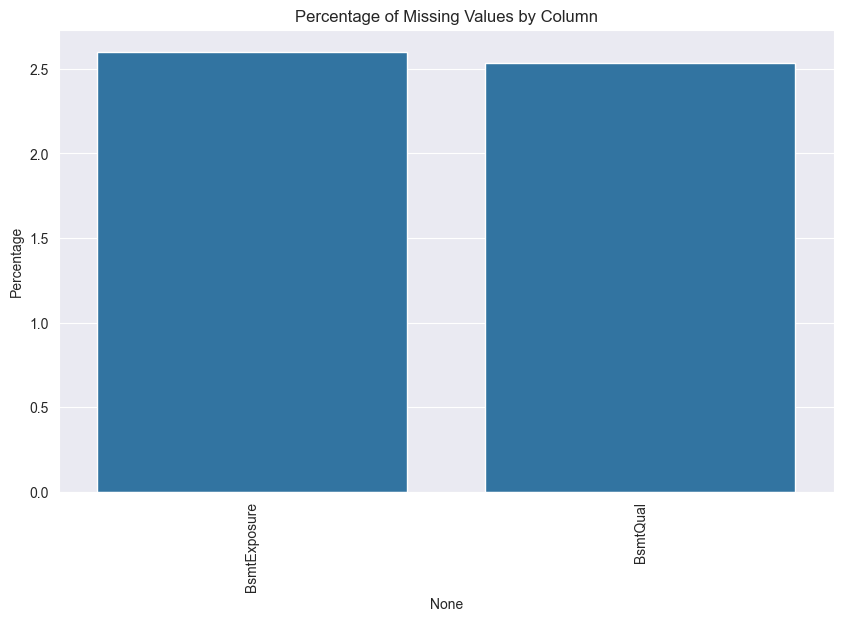

In [5]:
# Calculate the percentage of missing values for each column
missing_values = data.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.show()


### Only around 2.5% of missing values in columns BsmtExposure and BsmtQual, so we will not be dropping any columns due to empty values

## Statistical Summary

In [6]:
# Display basic statistics for numerical columns
data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,GarageArea,OpenPorchSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,1057.429452,1162.626712,346.992466,1515.463699,1.565068,0.613014,1.767123,472.980137,46.660274,180921.195890
std,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,438.705324,386.587738,436.528436,525.480383,0.550916,0.644666,0.747315,213.804841,66.256028,79442.502883
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,0.000000,1.000000,334.500000,0.000000,129975.000000
50%,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,991.500000,1087.000000,0.000000,1464.000000,2.000000,1.000000,2.000000,480.000000,25.000000,163000.000000
75%,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,1.000000,2.000000,576.000000,68.000000,214000.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,4.000000,1418.000000,547.000000,755000.000000


## Correlation Analysis

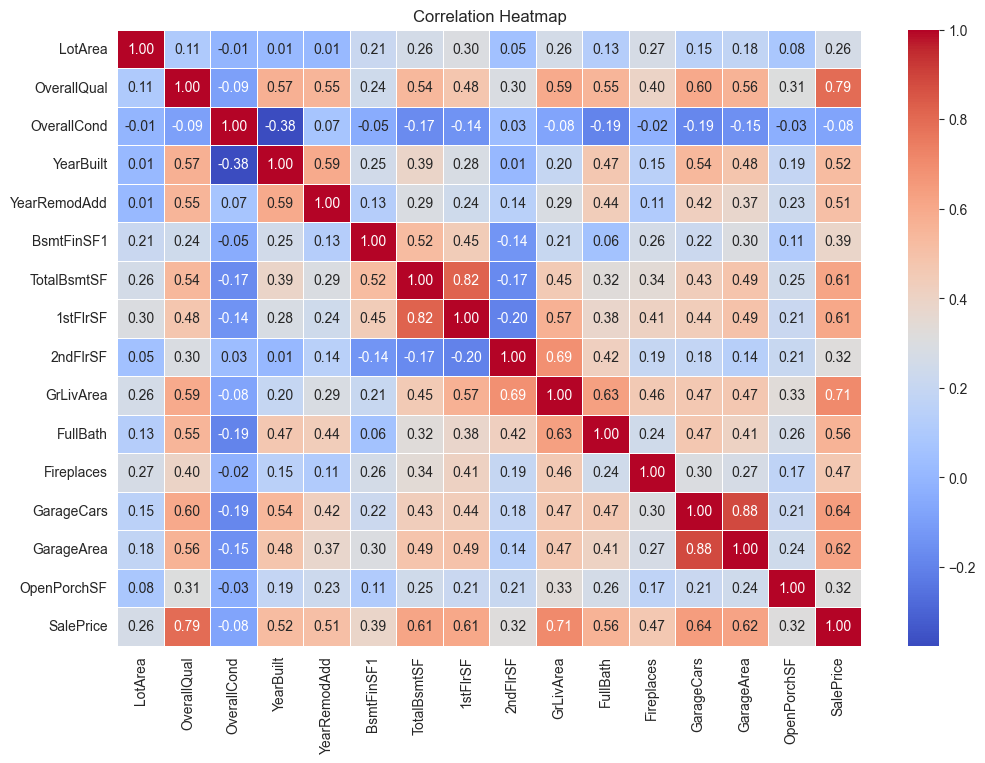

Correlation with SalePrice: 
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
Fireplaces      0.466929
BsmtFinSF1      0.386420
2ndFlrSF        0.319334
OpenPorchSF     0.315856
LotArea         0.263843
OverallCond    -0.077856
Name: SalePrice, dtype: float64


In [7]:
numeric_data = data.select_dtypes(include=['number']).copy()

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Correlation of features with SalePrice
correlations_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print('Correlation with SalePrice: \n', correlations_with_target)

#### It seems that there is only one attribute that has low correlation with target column and it is OverallCond. I dont think so that we will be dropping this column as it is good column to put into frontend for end user. Good information is that if user will be trying to lie about condition it will not affect predicted result that much

## Distribution of the Target Variable

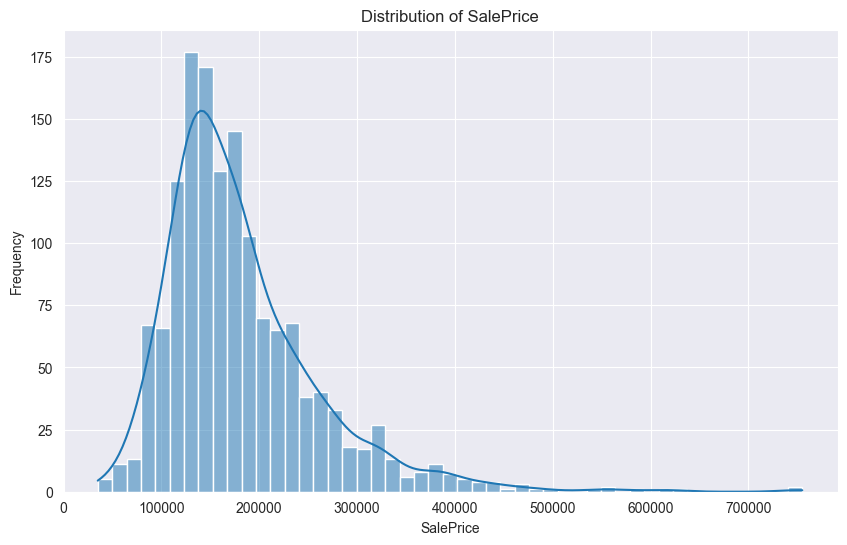

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

#### Categorical vs. Numerical Features Analysis

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Display unique values in each categorical column
for column in categorical_columns:
    print(f'Unique values in {column}: {data[column].nunique()}')
    print(data[column].value_counts())
    print('\n')
    
for column in numerical_columns:
    print(f'Unique values in {column}: {data[column].nunique()}')
    print(data[column].value_counts())
    print('\n')

Unique values in Neighborhood: 25
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


Unique values in BsmtQual: 4
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64


Unique values in BsmtExposure: 4
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64


Unique values in KitchenQual: 4
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


Unique values in LotArea: 1073
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64


Uniqu

#### Analyze Relationshup Between Important Features and Target

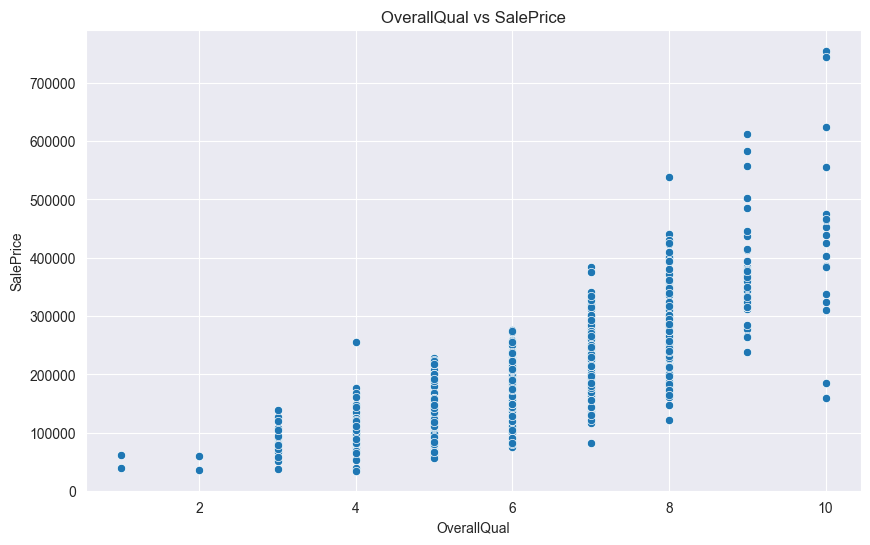

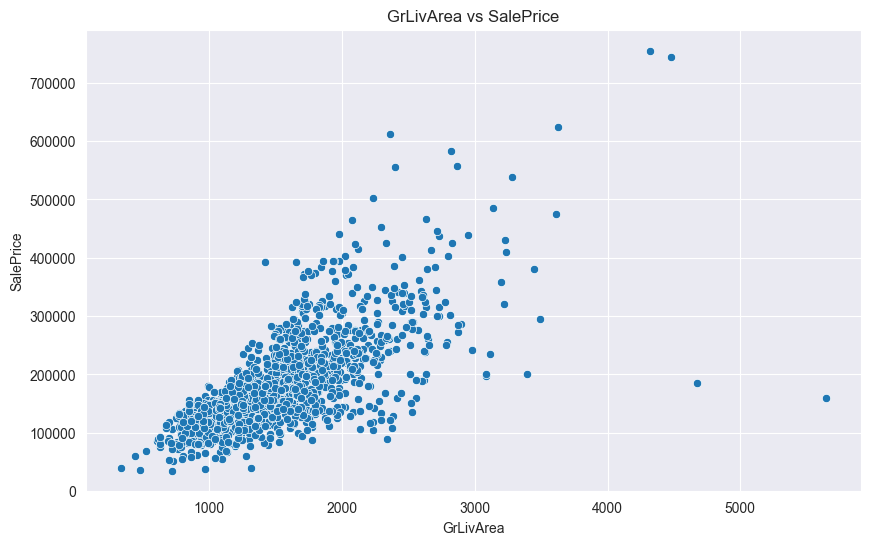

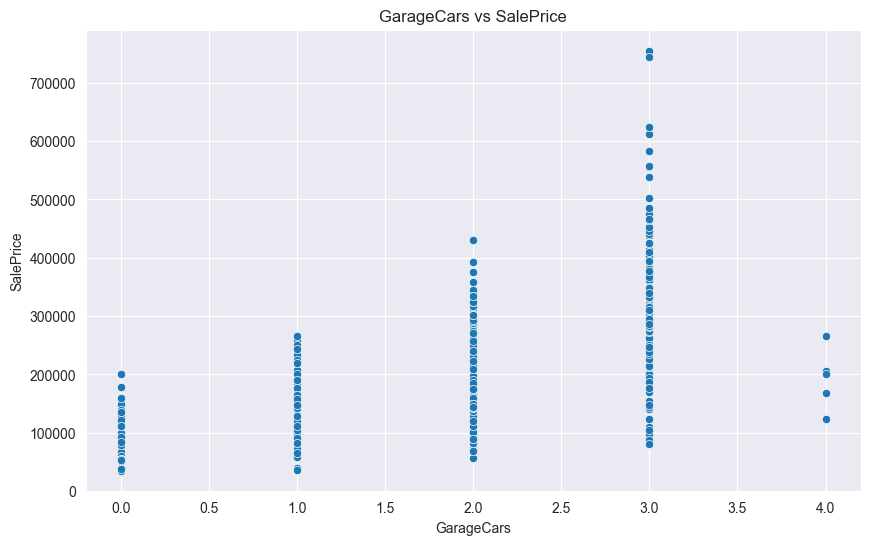

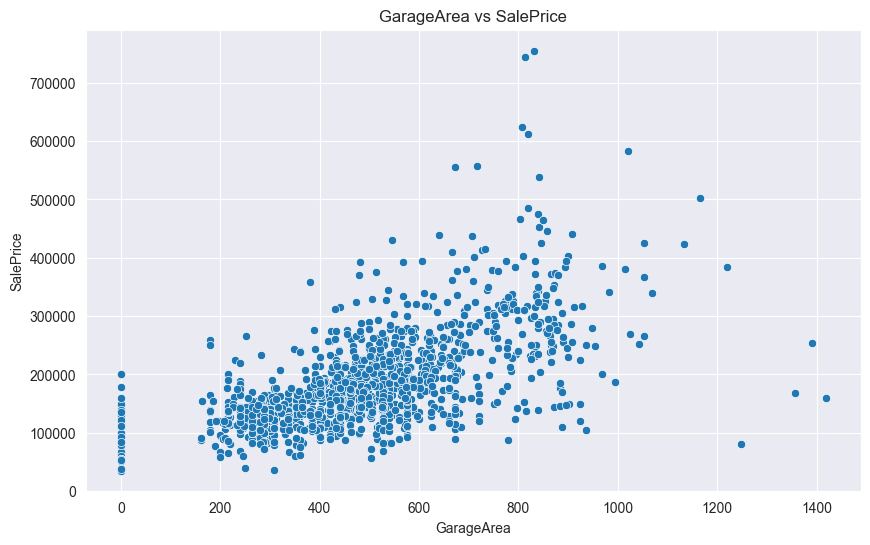

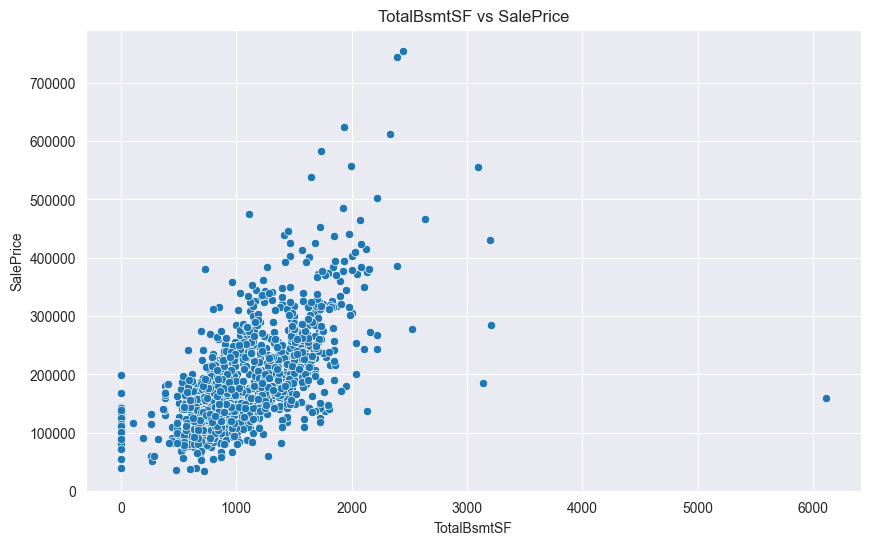

In [10]:
top_features = correlations_with_target.index[1:6]

# Plot relationships with SalePrice
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature, y='SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.show()

## Setting up AutoML

In [11]:
from tpot import TPOTRegressor

# Define a custom configuration for TPOT to prioritize regression algorithms
custom_regressor_config = {
    # Ensuring Linear Regression is included
    'sklearn.linear_model.LinearRegression': {},
    
    # Adding some other regression algorithms suitable for regression
    'sklearn.ensemble.RandomForestRegressor': {
        'n_estimators': [100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4]
    },
    'sklearn.ensemble.GradientBoostingRegressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    },
    'sklearn.tree.DecisionTreeRegressor': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'sklearn.svm.SVR': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10]
    }
}

# Load the dataset
file_path='../data/house_price_data.csv'
data = pd.read_csv(file_path)

# Data Preprocessing

# Step 1: Handle Missing Values
# Fill missing values for categorical features with 'Unknown' and for numerical features with mean.
categorical_columns = ['Neighborhood', 'BsmtQual', 'BsmtExposure', 'KitchenQual']
numeric_columns = data.select_dtypes(include=['number']).columns

# Fill missing categorical values with 'Unknown'
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Fill missing numerical values with column mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 2: One-Hot Encoding for Categorical Variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 3: Separate Features and Target Variable
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TPOT AutoML with Custom Configuration for Regression
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, config_dict=custom_regressor_config)
tpot.fit(X_train, y_train)

# Evaluate the Model
score = tpot.score(X_test, y_test)
print("TPOT R2 Score on Test Data:", score)

/Users/macbookpro/Documents/GitHub Projects/SUML/.venv/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -966515813.6693833

Generation 2 - Current best internal CV score: -934037342.2473838

Generation 3 - Current best internal CV score: -870708905.8728409

Generation 4 - Current best internal CV score: -870708905.8728409

Generation 5 - Current best internal CV score: -868307848.8898203

Best pipeline: RandomForestRegressor(SVR(LinearRegression(input_matrix), C=1, kernel=rbf), max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
TPOT R2 Score on Test Data: -738516162.9122378


/Users/macbookpro/Documents/GitHub Projects/SUML/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
